In [1]:
import os
import shutil
import pickle
import datetime
from bokeh.io import show, output_notebook

import lstid_bokeh

output_notebook()
%matplotlib inline

Loading BokehJS ...

# Load Data

LOADING: bokeh_cache/20181109_spotArray.pkl


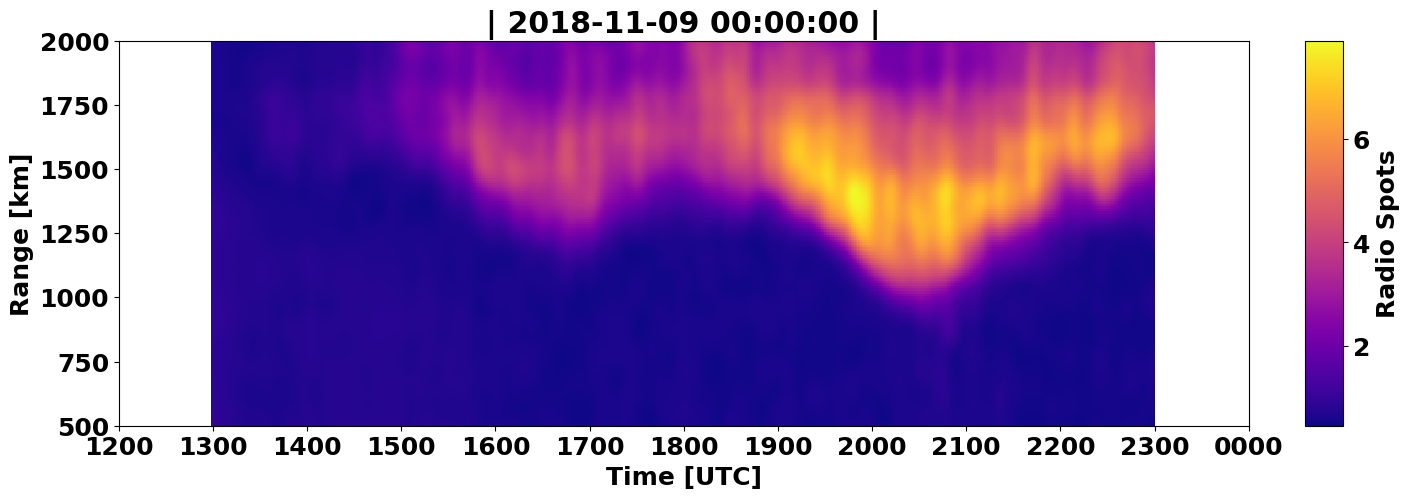

In [2]:
date        = datetime.datetime(2018,11,9)
clear_cache = False

cache_dir = 'bokeh_cache'
date_str  = date.strftime('%Y%m%d')
pkl_fname = '{!s}_spotArray.pkl'.format(date_str)
pkl_fpath = os.path.join(cache_dir,pkl_fname)

if clear_cache and os.path.exists(cache_dir):
    shutil.rmtree(cache_dir)

if not os.path.exists(cache_dir):
    os.makedirs(cache_dir)

if not os.path.exists(pkl_fpath):
    result = lstid_bokeh.load_spots(date)
    print('SAVING: {!s}'.format(pkl_fpath))
    with open(pkl_fpath,'wb') as fl:
        pickle.dump(result,fl)
else:
    print('LOADING: {!s}'.format(pkl_fpath))
    with open(pkl_fpath,'rb') as fl:
        result = pickle.load(fl)

lstid_bokeh.plot_heatmap(**result)

# Bokeh Output - With Bokeh Server

In [3]:
bka = lstid_bokeh.BkApp(result)
show(bka.bkapp) # notebook_url="http://localhost:8888" 